<a href="https://colab.research.google.com/github/TahniyatJavaid30/stock-trend-predictor/blob/main/tahniyat_javaid_project_2%2C_2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 **Import the necessary files**

In [2]:
import pandas as pd
import numpy as np                                                                    # For mathematical and numerical operations
from sklearn.preprocessing import StandardScaler                                      # For scaling (normalizing) data so all features are on the same level
from sklearn.linear_model import LogisticRegression                                   # For building a machine learning model to predict categories (like yes/no)
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix   # For checking how well the model performs accuracy, detailed report


**Load the csv file**

In [4]:
# Set the file path of the dataset
file_path = '/content/drive/MyDrive/project file 2025 /diabetes.csv'

# Read (load) the CSV file into a pandas DataFrame
df = pd.read_csv("/content/drive/MyDrive/project file 2025 /diabetes.csv")


# **Data exploration**

**Display the first few rows**

In [5]:
# Print a message to show what we’re displaying
print("First 5 rows of the dataset:")

# Show the first 5 rows of the dataset to understand its structure
df.head()


First 5 rows of the dataset:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


**Print the last 5 rows in the dataset**

In [6]:
# Print a message to show what we’re displaying
print("Last 5 rows of the dataset:")

# Show the last 5 rows of the dataset to check the ending part of the data
df.tail()


Last 5 rows of the dataset:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


**Print the data type of the datset**

In [ ]:
# Check what type of data is in each column (numbers, decimals, or text)
df.dtypes

**Print the shape of data**

In [ ]:
# Show the total number of rows and columns in the dataset
df.shape

**Display the columns name of the dataset**

In [ ]:
# Show the names of all columns in the dataset
df.columns

**Display the information about the dataset**


In [ ]:
# Print a message to show what we’re displaying
print("Display the information")

# Show details about the dataset — like column names, data types, and missing values
df.info()


**Check the duplicates in the dataset**

In [11]:
# Print a message to show what we’re checking
print("Display the duplicate:\n")

# Check how many duplicate rows are in the dataset (average value)
df.duplicated().mean()


Display the duplicate:



np.float64(0.0)

**Basic statistics about numeric columns**

In [12]:
# Print a message to show what we’re displaying
print("Basic statistics about numeric columns:")

# Show basic statistics (like count, mean, min, max, etc.) for all number columns
df.describe()


Basic statistics about numeric columns:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# **Data Cleaning**

**Check the missing values**

In [ ]:
# Print a message to show what we’re checking
print("Missing values:")

# Check how many missing (empty) values are present in each column
df.isnull().sum()


**Display missing values with 0 (its optional)**

In [13]:
# Print a message to show what we’re doing
print("Replace the missing values with 0:")

# Fill (replace) all missing or empty values in the dataset with 0
df.fillna(0)


Replace the missing values with 0:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


**Display the random samples**

In [14]:
# Pick 1 random row from the dataset (same row every time because of random_state = 42)
df.sample(1, random_state = 42)

# Pick another random row (with a different random_state value)
df.sample(1, random_state = 24)

# Pick one more random row (again with a different random_state)
df.sample(1, random_state = 37)

# Pick 3 random rows from the dataset
df.sample(3, random_state = 38)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
3,1,89,66,23,94,28.1,0.167,21,0
579,2,197,70,99,0,34.7,0.575,62,1
369,1,133,102,28,140,32.8,0.234,45,1


# **Discriptive Statistics**

**Display the average of diabetes pedigreefunction**

In [15]:
# Print a message to show what we’re displaying
print("Display the average of Diabetes:")

# Group the data by 'Outcome' and find the average of 'DiabetesPedigreeFunction' for each group
avg_dia = df.groupby('Outcome')['DiabetesPedigreeFunction'].mean()

# Show the result
print(avg_dia)


Display the average of Diabetes:
Outcome
0    0.429734
1    0.550500
Name: DiabetesPedigreeFunction, dtype: float64


**Display the average of Glucose**

**Display the average of Blood Pressure**

In [16]:
# Print a message to show what we’re displaying
print("Display the average of Blood Pressure:")

# Group the data by 'Outcome' and find the average Blood Pressure for each group
avg_bp = df.groupby('Outcome')['BloodPressure'].mean()

# Show the result
print(avg_bp)


Display the average of Blood Pressure:
Outcome
0    68.184000
1    70.824627
Name: BloodPressure, dtype: float64


# **Pearson Correlation Coefficient**

**Correlation between Age and Glucose**

In [19]:
# Check how Age and Glucose are related to each other
correlation_age_glucose = df[['Age', 'Glucose']].corr().iloc[0, 1]

# Print the result with only two decimal points
print(f"Correlation between Age and Glucose: {correlation_age_glucose:.2f}")


Correlation between Age and Glucose: 0.26


**Correlation between BMI and Glucose**

In [20]:
# Check how BMI and Glucose are related to each other
correlation_bmi_glucose = df[['BMI', 'Glucose']].corr().iloc[0, 1]

# Print the result with two decimal points
print(f"Correlation between BMI and Glucose: {correlation_bmi_glucose:.2f}")


Correlation between BMI and Glucose: 0.22


**Correlation between Insulin and Glucose**

In [ ]:
# Check how Insulin and Glucose are related to each other
correlation_insulin_glucose = df[['Insulin', 'Glucose']].corr().iloc[0, 1]

# Print the result with two decimal points
print(f"Correlation between Insulin and Glucose: {correlation_insulin_glucose:.2f}")


**Correlation between BMI and Skin Thickness**

In [ ]:
# Check how BMI and SkinThickness are related to each other
correlation_bmi_skinthickness = df[['BMI', 'SkinThickness']].corr().iloc[0, 1]

# Print the result with two decimal points
print(f"Correlation between BMI and SkinThickness: {correlation_bmi_skinthickness:.2f}")


**Correlation between BMI and Blood Pressure**

In [ ]:
# Check how BMI and Blood Pressure are related to each other
correlation_bmi_bloodpressure = df[['BMI', 'BloodPressure']].corr().iloc[0, 1]

# Print the result with two decimal points
print(f"Correlation between BMI and Blood Pressure: {correlation_bmi_bloodpressure:.2f}")


**Correlation between SkinThickness and Blood Pressure**

In [ ]:
# Check how SkinThickness and BloodPressure are related to each other
correlation_skinthickness_bloodpressure = df[['SkinThickness', 'BloodPressure']].corr().iloc[0, 1]

# Print the result with two decimal points
print(f"Correlation between SkinThickness and BloodPressure: {correlation_skinthickness_bloodpressure:.2f}")


**Correlation between SkinThickness and Insulin**

In [ ]:
# Check how SkinThickness and Insulin are related to each other
correlation_skinthickness_insulin = df[['SkinThickness', 'Insulin']].corr().iloc[0, 1]

# Print the result with two decimal points
print(f"Correlation between SkinThickness and Insulin: {correlation_skinthickness_insulin:.2f}")


# **Data  Visualization**

In [22]:
import seaborn as sns              # For creating attractive and easy statistical graphs
import matplotlib.pyplot as plot   # For making different types of charts and plots


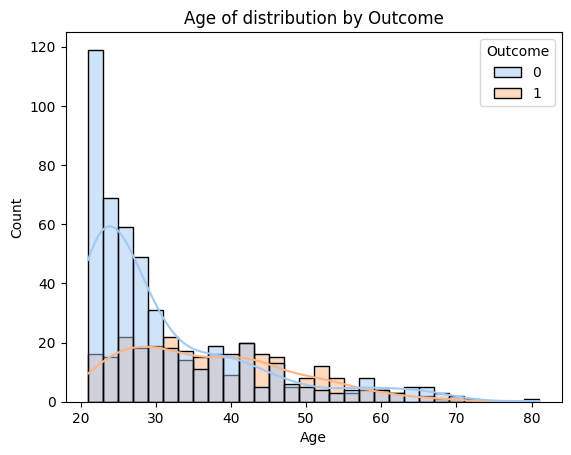

In [24]:
# Create a histogram to show the age distribution based on diabetes outcome
sns.histplot(data = df , x = 'Age' , hue = 'Outcome' , kde = True, bins =30 , palette = 'pastel')

# Add a title to the graph
plot.title('Age of distribution by Outcome')

# Label the X-axis as 'Age'
plot.xlabel('Age')

# Label the Y-axis as 'Count' (number of people)
plot.ylabel('Count')

# Show the final graph
plot.show()


/tmp/ipython-input-4244491850.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Outcome', data=df, palette='bright')


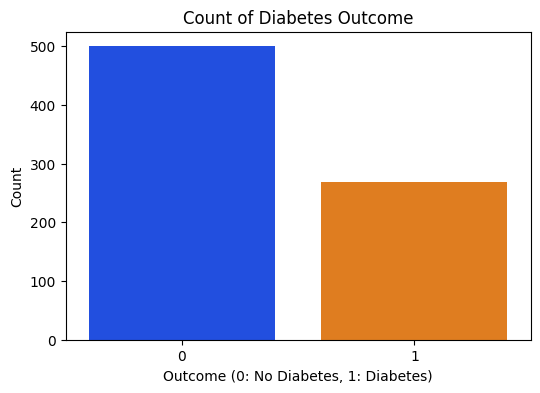

In [25]:
# Set the size of the plot
plot.figure(figsize=(6, 4))

# Create a count plot to show the number of people with and without diabetes
sns.countplot(x='Outcome', data=df, palette='bright')

# Add a title to the graph
plot.title('Count of Diabetes Outcome')

# Label the X-axis and explain what 0 and 1 mean
plot.xlabel('Outcome (0: No Diabetes, 1: Diabetes)')

# Label the Y-axis
plot.ylabel('Count')

# Display the plot
plot.show()


**Heatmap of Feature Correlation (Before Training)**

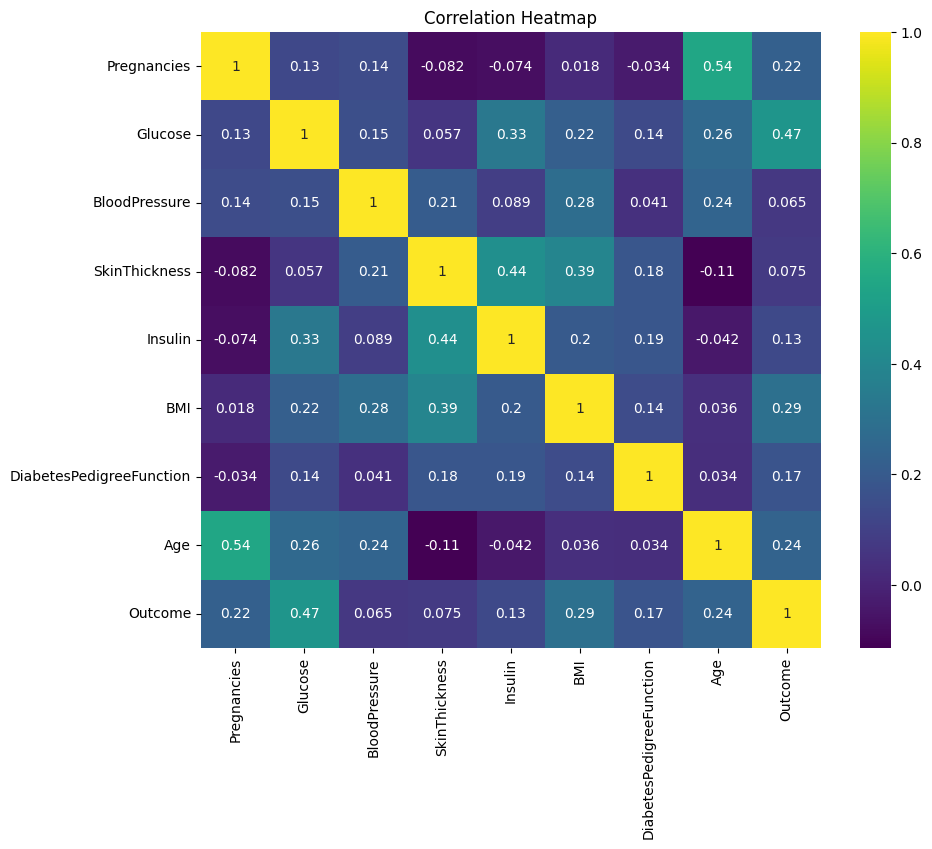

In [31]:
# Calculate the correlation between all numeric columns
correlation_matrix = df.corr()

# Set the size of the plot
plot.figure(figsize=(10, 8))

# Create a heatmap to show correlations using colors (annot=True shows numbers)
sns.heatmap(correlation_matrix, annot=True, cmap='viridis')

# Add a title to the heatmap
plot.title('Correlation Heatmap')

# Display the heatmap
plot.show()


**Features in x and target in y**

In [33]:
# Import function to split data into training and testing sets
from sklearn.model_selection import train_test_split

# Separate features (X) and target (y)
X = df.drop('Outcome', axis=1)  # All columns except 'Outcome' are features
y = df['Outcome']               # 'Outcome' is the target we want to predict

# Split the data into training and testing sets
# test_size=0.25 means 25% of the data will be used for testing
# random_state=42 ensures the same split every time we run the code
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Print the shapes of the training and testing sets
print("Training features shape:", X_train.shape)
print("Testing features shape:", X_test.shape)
print("Training labels shape:", y_train.shape)
print("Testing labels shape:", y_test.shape)


Training features shape: (576, 8)
Testing features shape: (192, 8)
Training labels shape: (576,)
Testing labels shape: (192,)


In [34]:
# Import Random Forest classifier
from sklearn.ensemble import RandomForestClassifier

# Step 2: Create the Random Forest model
# random_state=42 ensures reproducible results
model = RandomForestClassifier(random_state=42)

# Step 3: Train (fit) the model using the training data
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [35]:
# Import tools to check how well the model works
from sklearn.metrics import accuracy_score, classification_report

# Step 1: Predict the results for the test data
y_pred = model.predict(X_test)

# Step 2: Calculate how many predictions are correct (accuracy)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of the model:", accuracy)

# Step 3: Show a detailed report of model performance for each class
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy of the model: 0.734375

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.78      0.79       123
           1       0.62      0.65      0.64        69

    accuracy                           0.73       192
   macro avg       0.71      0.72      0.71       192
weighted avg       0.74      0.73      0.74       192

